# Direct imaging of exomoons at α Centauri *A* (or *B*)
[Script enhancements and clean-up aided by Microsoft Copilot and ChatGPT]

### Utilities

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import formatter

In [12]:
# Fundamental physical constants

gravitational_constant_m3_kg_1_s_2 = 6.6743e-11


# Useful conversion factors

arcsec_per_radian = 60. * 60. * 180. / np.pi
m_per_AU = 1.495978707e11

### Functional definitions

In [13]:
def calculate_semimajor_axis_m(P_s, M_total_kg):

    semimajor_axis_m = (gravitational_constant_m3_kg_1_s_2 * M_total_kg * P_s**2. / (4. * np.pi**2.))**(1/3)

    return semimajor_axis_m


first_positive_root_Bessel_function_first_kind_first_order = 3.8317059702075125
diffraction_limit_prefactor_circular_aperture = first_positive_root_Bessel_function_first_kind_first_order / np.pi

def B_diffraction_limit(wavelength_nm, distance_AU, distance_alphaCen_pc):

    B_Rayleigh_criterion_diffraction_limit = diffraction_limit_prefactor_circular_aperture * wavelength_nm * 1.e-9 * distance_alphaCen_pc * arcsec_per_radian / distance_AU

    return B_Rayleigh_criterion_diffraction_limit


def B_interference_limit(wavelength_nm, distance_AU, distance_alphaCen_pc):

    B_sparse_aperture_masking_interference_limit = wavelength_nm * 1.e-9 * distance_alphaCen_pc * arcsec_per_radian / (2. * distance_AU)

    return B_sparse_aperture_masking_interference_limit

### Parameter study

In [14]:
# Exoworld parameters of interest

distance_alphaCen_pc = 1.33

M_Saturn_kg = 5.6834e26
M_Earth_kg = 5.9722e24

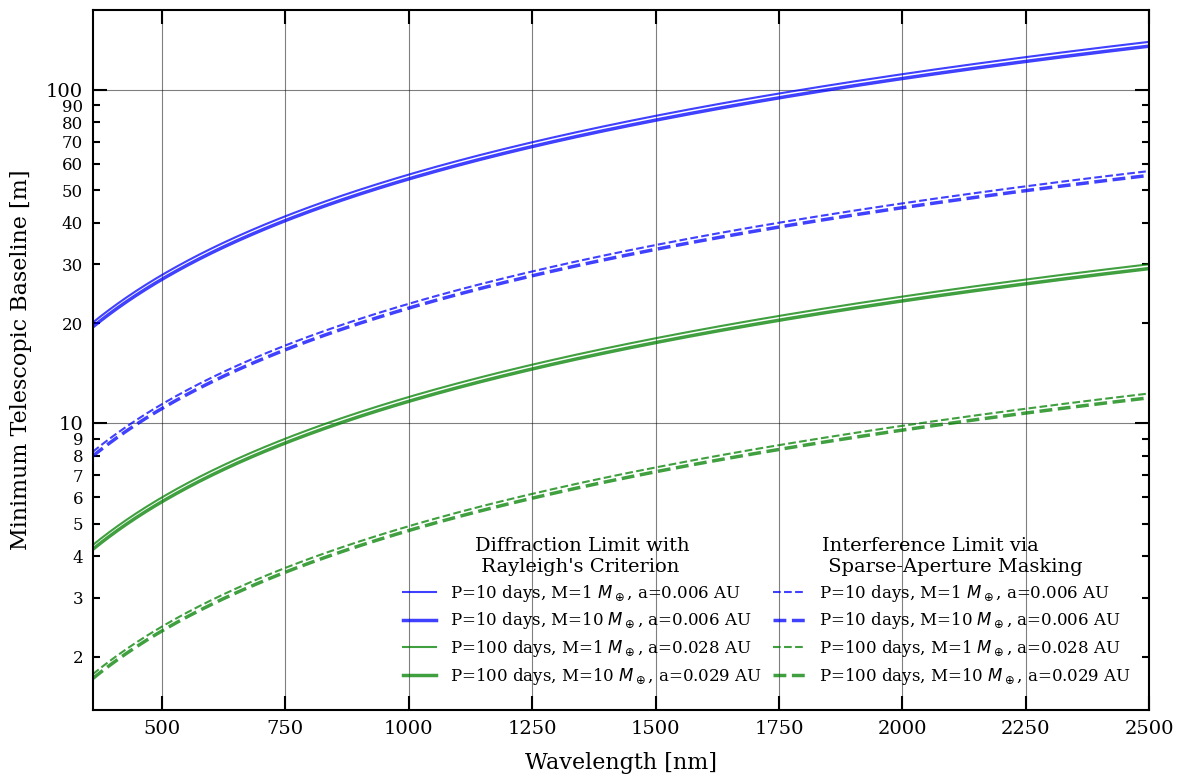

In [15]:
wavelength_nm = np.linspace(360., 2500., 1200)

exomoon_orbital_periods_days_list = [10., 100.]
exomoon_mass_in_Mearth_list   = [1., 10.]

exomoon_orbital_periods_colors  = {10.: 'blue', 100.: 'green'}
exomoon_masses_linewidths = {1.: 1.5, 10.: 2.5}

scientific_cases = []

for P_d in exomoon_orbital_periods_days_list:

    for M_moon_in_Mearth in exomoon_mass_in_Mearth_list:

        P_s = P_d * 24. * 60. * 60.
        M_total = M_Saturn_kg + M_moon_in_Mearth * M_Earth_kg

        a_m  = calculate_semimajor_axis_m(P_s, M_total)
        a_AU = a_m / m_per_AU

        scientific_case = {

            'B_Rayleigh': B_diffraction_limit(wavelength_nm, a_AU, distance_alphaCen_pc),
            'B_sparse': B_interference_limit(wavelength_nm, a_AU, distance_alphaCen_pc),
            'P_d': P_d,
            'M_moon_in_Mearth': M_moon_in_Mearth,
            'label': rf"P={int(P_d)} days, M={int(M_moon_in_Mearth)} $M_\oplus$, a={a_AU:.3f} AU",
            'color': exomoon_orbital_periods_colors[P_d],
            'linewidth': exomoon_masses_linewidths[M_moon_in_Mearth]

        }

        scientific_cases.append(scientific_case)


fig, ax = plt.subplots(figsize=(12,8))

rayleigh_handles = []
SAM_handles = []

for case in scientific_cases:

    h1, = ax.plot(
        wavelength_nm,
        case['B_Rayleigh'],
        color=case['color'],
        linestyle='-',
        linewidth=case['linewidth'],
        alpha=.75,
        label=case['label']
    )
    rayleigh_handles.append(h1)

    h2, = ax.plot(
        wavelength_nm,
        case['B_sparse'],
        color=case['color'],
        linestyle='--',
        linewidth=case['linewidth'],
        alpha=.75,
        label=case['label']
    )
    SAM_handles.append(h2)

labels = [case['label'] for case in scientific_cases]

legend1 = ax.legend(
    rayleigh_handles,
    labels,
    title="Diffraction Limit with\n Rayleigh's Criterion",
    loc='lower right',
    bbox_to_anchor=(.649, .01),
    title_fontsize=14,
    fontsize=12
)

ax.add_artist(legend1)

legend2 = ax.legend(
    SAM_handles,
    labels,
    title="Interference Limit via\n Sparse-Aperture Masking",
    loc='lower right',
    bbox_to_anchor=(.999, .01),
    title_fontsize=14,
    fontsize=12
)

ax.set_xlabel("Wavelength [nm]", fontsize=16)
ax.set_ylabel("Minimum Telescopic Baseline [m]", fontsize=16)

#ax.set_title(
#    r"Baseline($\lambda$) to Angularly Resolve Hypothetical Exomoons at $\alpha$ Centauri $A$ (or $B$)"
#    "\n[assuming a Saturn-mass primary exoplanet and using Kepler's 3ʳᵈ law]",
#    fontsize=18
#)

ax.set_xlim(360., 2500.)
ax.set_yscale('log')
ax.grid(True, linestyle='-', color='black', alpha=.5, linewidth=.8)

yfmt = ScalarFormatter()
yfmt.set_scientific(False)
yfmt.set_useOffset(False)

ax.yaxis.set_major_formatter(yfmt)
ax.yaxis.set_minor_formatter(yfmt)

ax.tick_params(axis='both', which='major', width=1.5, length=10, labelsize=14)
ax.tick_params(axis='both', which='minor', width=1.5, length=5, labelsize=12)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()